In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.applications import MobileNetV3Small
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

In [2]:
dataset=r'C:\Users\KIIT\Videos\Face_Mask_Detection\dataset'
image_site=list(paths.list_images(dataset))
image_site

['C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0014.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0029.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0043.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0074.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0084.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_aidai_0136.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0004.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0020.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0025.jpg',
 'C:\\Users\\KIIT\\Videos\\Face_Mask_Detection\\dataset\\without_mask\\0_0_anhu_0027.jpg',
 'C:\

In [3]:
images=[]
category=[]
for a in image_site:
    label=a.split(os.path.sep)[-2]
    category.append(label)
    image=load_img(a,target_size=(224,224))
    image=img_to_array(image)
    image=preprocess_input(image)
    images.append(image)

C:\Users\KIIT\anaconda3\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [4]:
images

[array([[[  7.,   3.,  18.],
         [  7.,   3.,  18.],
         [  7.,   3.,  18.],
         ...,
         [ 19.,  12.,  28.],
         [ 19.,  12.,  28.],
         [ 20.,  13.,  29.]],
 
        [[ 11.,   7.,  22.],
         [ 11.,   7.,  22.],
         [ 11.,   7.,  22.],
         ...,
         [ 30.,  26.,  41.],
         [ 30.,  26.,  41.],
         [ 31.,  27.,  42.]],
 
        [[ 10.,   5.,  25.],
         [ 10.,   5.,  25.],
         [ 10.,   5.,  25.],
         ...,
         [ 15.,  13.,  27.],
         [ 17.,  15.,  29.],
         [ 18.,  16.,  30.]],
 
        ...,
 
        [[176.,   5.,  81.],
         [177.,   5.,  77.],
         [176.,   5.,  73.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[165.,   6.,  73.],
         [162.,   3.,  67.],
         [159.,   4.,  62.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],
 
        [[160.,   7.,  71.],
 

In [5]:
category

['without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask',
 'without_mask

In [6]:
images=np.array(images,dtype='float32')
category=np.array(category)

In [7]:
images.shape

(3833, 224, 224, 3)

In [8]:
images

array([[[[  7.,   3.,  18.],
         [  7.,   3.,  18.],
         [  7.,   3.,  18.],
         ...,
         [ 19.,  12.,  28.],
         [ 19.,  12.,  28.],
         [ 20.,  13.,  29.]],

        [[ 11.,   7.,  22.],
         [ 11.,   7.,  22.],
         [ 11.,   7.,  22.],
         ...,
         [ 30.,  26.,  41.],
         [ 30.,  26.,  41.],
         [ 31.,  27.,  42.]],

        [[ 10.,   5.,  25.],
         [ 10.,   5.,  25.],
         [ 10.,   5.,  25.],
         ...,
         [ 15.,  13.,  27.],
         [ 17.,  15.,  29.],
         [ 18.,  16.,  30.]],

        ...,

        [[176.,   5.,  81.],
         [177.,   5.,  77.],
         [176.,   5.,  73.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[165.,   6.,  73.],
         [162.,   3.,  67.],
         [159.,   4.,  62.],
         ...,
         [  0.,   0.,   0.],
         [  0.,   0.,   0.],
         [  0.,   0.,   0.]],

        [[160.,   7.,  71.],
       

In [9]:
category

array(['without_mask', 'without_mask', 'without_mask', ..., 'with_mask',
       'with_mask', 'with_mask'], dtype='<U12')

In [10]:
lb=LabelBinarizer()
category=lb.fit_transform(category)
category=to_categorical(category)

In [11]:
category

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [12]:
train_X,test_X,train_Y,test_Y=train_test_split(images,category,test_size=0.30,stratify=category,random_state=10)

In [13]:
train_X.shape

(2683, 224, 224, 3)

In [14]:
train_Y.shape

(2683, 2)

In [15]:
test_X.shape

(1150, 224, 224, 3)

In [16]:
test_Y.shape

(1150, 2)

In [17]:
aug=ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,shear_range=0.15,horizontal_flip=True,vertical_flip=True)

In [18]:
import tensorflow as tf

In [19]:
baseModel=tf.keras.applications.MobileNetV3Small(
    input_shape=(224,224,3),
    alpha=1.0,
    minimalistic=False,
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
)

In [20]:
baseModel.summary()

Model: "MobilenetV3small"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                   

In [21]:
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, AveragePooling2D, Conv2D

In [22]:
headModel=baseModel.output
headModel=AveragePooling2D(pool_size=(7,7))(headModel)
headModel=Flatten(name='Flatten')(headModel)
headModel=Dense(1028,activation='relu')(headModel)
headModel=Dropout(0.5)(headModel)
headModel=Dense(2,activation='Softmax')(headModel)
model=Model(inputs=baseModel.input,outputs=headModel)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 Conv (Conv2D)                  (None, 112, 112, 16  432         ['rescaling[0][0]']              
                                )                                                                 
                                                                                              

In [23]:
learning_rate=0.001
Epochs=20
BS=12

opt=Adam(lr=learning_rate,decay=learning_rate/Epochs)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

C:\Users\KIIT\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [24]:
history=model.fit(
    
    aug.flow(train_X,train_Y,batch_size=BS),
    steps_per_epoch=len(train_X)//BS,
    validation_data=(test_X,test_Y),
    validation_steps=len(test_X)//BS,
    epochs=Epochs
)


model.save(r'C:\Users\KIIT\Videos\Face_Mask_Detection\mobilenet_v3Small.model')

Epoch 1/20
223/223 [==============================] - 117s 503ms/step - loss: 0.1505 - accuracy: 0.9435 - val_loss: 1.2326 - val_accuracy: 0.8530
Epoch 2/20
223/223 [==============================] - 109s 489ms/step - loss: 0.0418 - accuracy: 0.9876
Epoch 3/20
223/223 [==============================] - 99s 442ms/step - loss: 0.0473 - accuracy: 0.9835
Epoch 4/20
223/223 [==============================] - 100s 447ms/step - loss: 0.0669 - accuracy: 0.9824
Epoch 5/20
223/223 [==============================] - 101s 454ms/step - loss: 0.0494 - accuracy: 0.9854
Epoch 6/20
223/223 [==============================] - 94s 420ms/step - loss: 0.0893 - accuracy: 0.9768
Epoch 7/20
223/223 [==============================] - 94s 421ms/step - loss: 0.0778 - accuracy: 0.9805
Epoch 8/20
223/223 [==============================] - 112s 502ms/step - loss: 0.0287 - accuracy: 0.9910
Epoch 9/20
223/223 [==============================] - 146s 653ms/step - loss: 0.0278 - accuracy: 0.9899
Epoch 10/20
223/223 [====

INFO:tensorflow:Assets written to: C:\Users\KIIT\Videos\Face_Mask_Detection\mobilenet_v3Small.model\assets


INFO:tensorflow:Assets written to: C:\Users\KIIT\Videos\Face_Mask_Detection\mobilenet_v3Small.model\assets


In [26]:
predict=model.predict(test_X,batch_size=BS)
predict=np.argmax(predict,axis=1)
print("CLASSIFICATION REPORT :\n")
print(classification_report(test_Y.argmax(axis=1),predict,target_names=lb.classes_))

CLASSIFICATION REPORT :

              precision    recall  f1-score   support

   with_mask       0.95      1.00      0.97       575
without_mask       1.00      0.95      0.97       575

    accuracy                           0.97      1150
   macro avg       0.97      0.97      0.97      1150
weighted avg       0.97      0.97      0.97      1150



In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

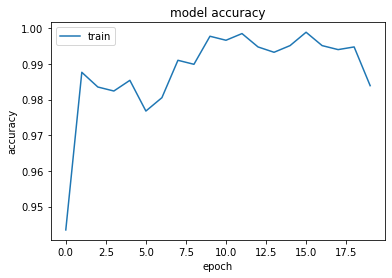

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

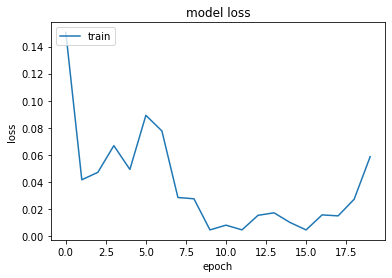

In [29]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()